In [ ]:
#@title AHP
import numpy as np
tc = ['Price', 'Distance', 'Labor', 'Wage']
pa = ['A', 'B', 'C']

mttc = np.array([
    [1, 1/5, 3, 4],
    [5, 1, 9, 7],
    [1/3, 1/9, 1, 2],
    [1/4, 1/7, 1/2, 1]
])

patc = []
patc.append(np.array([
    [1, 3, 2],
    [1/3, 1, 1/5],
    [1/2, 5, 1]
]))
patc.append(np.array([
    [1, 6, 1/3],
    [1/6, 1, 1/9],
    [3, 9, 1]
]))
patc.append(np.array([
    [1, 1/3, 1],
    [3, 1, 7],
    [1, 1/7, 1]
]))
patc.append(np.array([
    [1, 1/3, 1/2],
    [3, 1, 4],
    [2, 1/4, 1]
]))
# QUÁ TRÌNH XÁC ĐỊNH TỶ SỐ NHẤT QUÁN
# Bước 1: Nhân ma trận so sánh ban đầu với vectơ trọng số(kết quả thu được vectơ tổng trọng số),
# Bước 2: Chia vectơ tổng trọng số cho vectơ trọng số đã được xác định trước đó(kết quả thu được vectơ nhất quán),
# Bước 3: Tính giá trị riêng lớn nhất (λmax) bằng cách lấy giá trị trung bình của vectơ nhất quán.
# Bước 4: Tính chỉ số nhất quán (CI), chỉ số đo lường mức độ chệch hướng nhất quán: CI = (lamdaMAX - n) / (n-1)
# Bước 5: Tỷ số nhất quán: CR = CI / RI
RI = {}
RI[3] = 0.52
RI[4] = 0.89
RI[5] = 1.11
RI[6] = 1.25
RI[7] = 1.35
RI[8] = 1.40
RI[9] = 1.45
RI[10] = 1.49
RI[11] = 1.52
RI[12] = 1.54
RI[13] = 1.56
RI[14] = 1.58
RI[15] = 1.59

def find_TSNQ(a):
    n, _ = a.shape
    if (n < 2):
        return 1
    bo_trong_so = find_vector(a)
    vector_tong_ts = np.dot(a, bo_trong_so) #B1
    vector_nhat_quan = vector_tong_ts / bo_trong_so #B2
    lamda_max = np.sum(vector_nhat_quan) / n #B3
    CI = (lamda_max - n) / (n-1) #B4
    CR = CI / RI[n] #B5
    return CR

# PHƯƠNG PHÁP CHUẨN HÓA MA TRẬN
# Bước 1: Tính tổng giá trị từng cột của ma trận so sánh,
# Bước 2: Chia từng phần tử trong ma trận với tổng cột tương ứng (kết quả  thu được ma trận chuẩn hóa),
# Bước 3:Tính tổng từng hàng của ma trận chuẩn hóa,
# Bước 4: Chia tổng từng hàng cho tổng của tất cả các hàng (kết quả thu được vectơ trọng số tương ứng).
def find_vector(a):
    tong_cot = a.sum(axis=0) #B1
    a = a / tong_cot #B2
    tong_hang = a.sum(axis=1) #B3
    return tong_hang / np.sum(a) #B4

############################################################################
nhat_quan= True
tsnq= find_TSNQ(mttc)
if (tsnq > 0.1):
    nhat_quan= False
    print('Ma trận tiêu chí có chỉ số nhất quán là', tsnq, 'nên không nhất quán!')

# demo CR = 0.02
# patc[0]= np.array([
#     [1/1, 1/2, 3/1],
#     [2/1, 1/1, 4/1],
#     [1/3, 1/4, 1/1]
# ])

for i in range(len(tc)):
    if (find_TSNQ(patc[i]) > 0.1):
        # nhat_quan= False
        tsnq = find_TSNQ(patc[i])
        # print('Ma trận phương án theo tiêu chí', tc[i], 'có chỉ số nhất quán là', tsnq, 'nên không nhất quán!')

import sys
if (not nhat_quan):
    sys.exit()
#######################################################################

tstc = find_vector(mttc)
print('\nTRỌNG SỐ CỦA CÁC TIÊU CHÍ:\n', tc, '\n', tstc,'\n')
tstc = tstc.T.reshape(len(tc),1)

mtts = np.empty((3,4))
for i in range(len(tc)):
    vector = find_vector(patc[i])
    mtts[:, i] = vector
    print('\nTRỌNG SỐ CỦA CÁC PHƯƠNG ÁN THEO TIÊU CHÍ:', tc[i], '\n', pa, '\n', vector)

###################################################
print('\n\nTỔNG HỢP BẢNG ĐIỂM CỦA CÁC PHƯƠNG ÁN:')
score = np.dot(mtts, tstc).reshape(1, len(pa))
print(pa)
print(score)

print('\n\nXẾP HẠNG CÁC PHƯƠNG ÁN TỪ ĐIỂM CAO ĐẾN THẤP:')
rank = {}
score = score[0].tolist()
for i in range(len(pa)):
    rank[pa[i]] = score[i]

rank = dict(sorted(rank.items(), key=lambda item: item[1], reverse=True))
for key, value in rank.items():
    print(f"{key}: {value:.2f}")
print()


TRỌNG SỐ CỦA CÁC TIÊU CHÍ:
 ['Price', 'Distance', 'Labor', 'Wage'] 
 [0.19934746 0.65348332 0.08599584 0.06117339] 


TRỌNG SỐ CỦA CÁC PHƯƠNG ÁN THEO TIÊU CHÍ: Price 
 ['A', 'B', 'C'] 
 [0.50126263 0.11847643 0.38026094]

TRỌNG SỐ CỦA CÁC PHƯƠNG ÁN THEO TIÊU CHÍ: Distance 
 ['A', 'B', 'C'] 
 [0.28192308 0.05980769 0.65826923]

TRỌNG SỐ CỦA CÁC PHƯƠNG ÁN THEO TIÊU CHÍ: Labor 
 ['A', 'B', 'C'] 
 [0.17897252 0.68506571 0.13596177]

TRỌNG SỐ CỦA CÁC PHƯƠNG ÁN THEO TIÊU CHÍ: Wage 
 ['A', 'B', 'C'] 
 [0.15603402 0.61961722 0.22434875]


TỔNG HỢP BẢNG ĐIỂM CỦA CÁC PHƯƠNG ÁN:
['A', 'B', 'C']
[[0.30909348 0.15951819 0.53138833]]


XẾP HẠNG CÁC PHƯƠNG ÁN TỪ ĐIỂM CAO ĐẾN THẤP:
C: 0.53
A: 0.31
B: 0.16



In [ ]:
#@title FuzzyAHP
!pip install pyDecision

import numpy as np
tc = ['Price', 'Distance', 'Labor', 'Wage']
pa = ['A', 'B', 'C']
peo = ['Alice', 'Bob', 'Cris']

################ Alice ######################
_mttc = []
_mttc.append(np.array([
    [1, 1/5, 3, 4],
    [5, 1, 9, 7],
    [1/3, 1/9, 1, 2],
    [1/4, 1/7, 1/2, 1]
]))

_patc = []
_patc.append([])
_patc[0].append(np.array([
    [1, 3, 2],
    [1/3, 1, 1/5],
    [1/2, 5, 1]
]))
_patc[0].append(np.array([
    [1, 6, 1/3],
    [1/6, 1, 1/9],
    [3, 9, 1]
]))
_patc[0].append(np.array([
    [1, 1/3, 1],
    [3, 1, 7],
    [1, 1/7, 1]
]))
_patc[0].append(np.array([
    [1, 1/3, 1/2],
    [3, 1, 4],
    [2, 1/4, 1]
]))


################ Bob ######################

_mttc.append(np.array([
    [1, 1/5, 3, 4],
    [5, 1, 9, 7],
    [1/3, 1/9, 1, 2],
    [1/4, 1/7, 1/2, 1]
]))

_patc.append([])
_patc[1].append(np.array([
    [1, 3, 2],
    [1/3, 1, 1/5],
    [1/2, 5, 1]
]))
_patc[1].append(np.array([
    [1, 6, 1/3],
    [1/6, 1, 1/9],
    [3, 9, 1]
]))
_patc[1].append(np.array([
    [1, 1/3, 1],
    [3, 1, 7],
    [1, 1/7, 1]
]))
_patc[1].append(np.array([
    [1, 1/3, 1/2],
    [3, 1, 4],
    [2, 1/4, 1]
]))

################ Cris ######################

_mttc.append(np.array([
    [1, 1/5, 3, 4],
    [5, 1, 9, 7],
    [1/3, 1/9, 1, 2],
    [1/4, 1/7, 1/2, 1]
]))

_patc.append([])
_patc[2].append(np.array([
    [1, 3, 2],
    [1/3, 1, 1/5],
    [1/2, 5, 1]
]))
_patc[2].append(np.array([
    [1, 6, 1/3],
    [1/6, 1, 1/9],
    [3, 9, 1]
]))
_patc[2].append(np.array([
    [1, 1/3, 1],
    [3, 1, 7],
    [1, 1/7, 1]
]))
_patc[2].append(np.array([
    [1, 1/3, 1/2],
    [3, 1, 4],
    [2, 1/4, 1]
]))

##################  Fuzy Matrix ###################

def fuzzy_mttc(_mttc, peo, tc):
    mttc = np.empty((tc, tc), dtype=object)
    for i in range(tc):
      for j in range(tc):

        L = 999999999
        U = -999999999
        M = 0
        for k in range(peo):
          L = min(L, _mttc[k][i][j])
          U = max(U, _mttc[k][i][j])
          M += _mttc[k][i][j]
        mttc[i][j] = (L, M/peo, U)
    return mttc


##################################################
mttc = fuzzy_mttc(_mttc, len(peo), len(tc))

print('\nMA TRẬN TIÊU CHÍ MỜ:\n')

print(mttc)


#######################################################

from pyDecision.algorithm import fuzzy_ahp_method

fuzzy_weights, defuzzified_weights, normalized_weights, rc = fuzzy_ahp_method(mttc)

print('\nTRỌNG SỐ CỦA CÁC TIÊU CHÍ:\n', tc, '\n')

for i in range(0, len(normalized_weights)):
  print('tc'+str(i+1)+': ', round(normalized_weights[i], 3))

tstc = np.array(normalized_weights)
tstc = tstc.T.reshape(len(tc),1)

############################################################

# # Consistency Ratio
# print('RC: ' + str(round(rc, 2)))
# if (rc > 0.10):
#   print('The solution is inconsistent, the pairwise comparisons must be reviewed')
# else:
#   print('The solution is consistent')

print('\nMA TRẬN PHƯƠNG ÁN TIÊU CHÍ MỜ:\n')
patc = []
for i in range(len(tc)):
  _mttc = []
  for p in range(len(peo)):
    _mttc.append(_patc[p][i])
  patc.append(fuzzy_mttc(_mttc, len(peo), len(pa)))

print(patc)

mtts = np.empty((3,4))
for i in range(len(tc)):
    fuzzy_weights, defuzzified_weights, normalized_weights, rc = fuzzy_ahp_method(patc[i])
    # # Consistency Ratio
    vector = normalized_weights
    mtts[:, i] = vector
    print('\nTRỌNG SỐ CỦA CÁC PHƯƠNG ÁN THEO TIÊU CHÍ:', tc[i], '\n', pa, '\n', vector)


###################################################
print('\n\nTỔNG HỢP BẢNG ĐIỂM CỦA CÁC PHƯƠNG ÁN:')
score = np.dot(mtts, tstc).reshape(1, len(pa))
print(pa)
print(score)

print('\n\nXẾP HẠNG CÁC PHƯƠNG ÁN TỪ ĐIỂM CAO ĐẾN THẤP:')
rank = {}
score = score[0].tolist()
for i in range(len(pa)):
    rank[pa[i]] = score[i]

rank = dict(sorted(rank.items(), key=lambda item: item[1], reverse=True))
for key, value in rank.items():
    print(f"{key}: {value:.2f}")
print()


MA TRẬN TIÊU CHÍ MỜ:

[[(1.0, 1.0, 1.0) (0.2, 0.20000000000000004, 0.2) (3.0, 3.0, 3.0)
  (4.0, 4.0, 4.0)]
 [(5.0, 5.0, 5.0) (1.0, 1.0, 1.0) (9.0, 9.0, 9.0) (7.0, 7.0, 7.0)]
 [(0.3333333333333333, 0.3333333333333333, 0.3333333333333333)
  (0.1111111111111111, 0.1111111111111111, 0.1111111111111111)
  (1.0, 1.0, 1.0) (2.0, 2.0, 2.0)]
 [(0.25, 0.25, 0.25)
  (0.14285714285714285, 0.14285714285714285, 0.14285714285714285)
  (0.5, 0.5, 0.5) (1.0, 1.0, 1.0)]]

TRỌNG SỐ CỦA CÁC TIÊU CHÍ:
 ['Price', 'Distance', 'Labor', 'Wage'] 

tc1:  0.196
tc2:  0.664
tc3:  0.082
tc4:  0.058

MA TRẬN PHƯƠNG ÁN TIÊU CHÍ MỜ:

[array([[(1.0, 1.0, 1.0), (3.0, 3.0, 3.0), (2.0, 2.0, 2.0)],
       [(0.3333333333333333, 0.3333333333333333, 0.3333333333333333),
        (1.0, 1.0, 1.0), (0.2, 0.20000000000000004, 0.2)],
       [(0.5, 0.5, 0.5), (5.0, 5.0, 5.0), (1.0, 1.0, 1.0)]], dtype=object), array([[(1.0, 1.0, 1.0), (6.0, 6.0, 6.0),
        (0.3333333333333333, 0.3333333333333333, 0.3333333333333333)],
       [(0.

In [ ]:
#@title ModtifyAHP (Cải tiến 2: Đơn giản phương án so sánh )
import numpy as np
tc = ['Price', 'Distance', 'Labor', 'Wage']
pa = ['A', 'B', 'C']
_ = None

mttc = np.array([
    [_, 1/5, _, _],
    [_, _, 9, _],
    [_, _, _, 2],
    [_, _, _, _]
])

patc = []
patc.append(np.array([
    [_, 3, _],
    [_, _, 1/5],
    [_, _, _]
]))
patc.append(np.array([
    [_, 6, _],
    [_, _, 1/9],
    [_, _, _]
]))
patc.append(np.array([
    [_, 1/3, _],
    [_, _, 7],
    [_, _, _]
]))
patc.append(np.array([
    [_, 1/3, _],
    [_, _, 4],
    [_, _, _]
]))

def motify_matrix(a, n): #Cai tien 2
  #Tao ra duong cheo chinh gom cac phan tu bang 1
  for i in range(n):
    a[i][i] = 1

  #Ap dung tinh chat
  for i in range(n-2):
    for j in range(i+1, n):
      a[i][j] = a[i][j-1] * a[j-1][j]

  #Ma tran tam giac duoi = tam giac tren
  for i in range(n):
    for j in range(i, n):
      a[j][i] = 1 / a[i][j]
  return a

mttc = motify_matrix(mttc, len(tc))

print("\n\nMA TRẬN TIÊU CHÍ (modtify2):\n", mttc)

print("\n\nMA TRẬN PHƯƠNG ÁN THEO TIÊU CHÍ:\n")
for ar in patc:
  ar = motify_matrix(ar, len(pa))
  print(ar,"\n\n")



# QUÁ TRÌNH XÁC ĐỊNH TỶ SỐ NHẤT QUÁN
# Bước 1: Nhân ma trận so sánh ban đầu với vectơ trọng số(kết quả thu được vectơ tổng trọng số),
# Bước 2: Chia vectơ tổng trọng số cho vectơ trọng số đã được xác định trước đó(kết quả thu được vectơ nhất quán),
# Bước 3: Tính giá trị riêng lớn nhất (λmax) bằng cách lấy giá trị trung bình của vectơ nhất quán.
# Bước 4: Tính chỉ số nhất quán (CI), chỉ số đo lường mức độ chệch hướng nhất quán: CI = (lamdaMAX - n) / (n-1)
# Bước 5: Tỷ số nhất quán: CR = CI / RI
RI = {}
RI[3] = 0.52
RI[4] = 0.89
RI[5] = 1.11
RI[6] = 1.25
RI[7] = 1.35
RI[8] = 1.40
RI[9] = 1.45
RI[10] = 1.49
RI[11] = 1.52
RI[12] = 1.54
RI[13] = 1.56
RI[14] = 1.58
RI[15] = 1.59

def find_TSNQ(a):
    n, _ = a.shape
    if (n < 2):
        return 1
    bo_trong_so = find_vector(a)
    vector_tong_ts = np.dot(a, bo_trong_so) #B1
    vector_nhat_quan = vector_tong_ts / bo_trong_so #B2
    lamda_max = np.sum(vector_nhat_quan) / n #B3
    CI = (lamda_max - n) / (n-1) #B4
    CR = CI / RI[n] #B5
    return CR

# PHƯƠNG PHÁP CHUẨN HÓA MA TRẬN
# Bước 1: Tính tổng giá trị từng cột của ma trận so sánh,
# Bước 2: Chia từng phần tử trong ma trận với tổng cột tương ứng (kết quả  thu được ma trận chuẩn hóa),
# Bước 3:Tính tổng từng hàng của ma trận chuẩn hóa,
# Bước 4: Chia tổng từng hàng cho tổng của tất cả các hàng (kết quả thu được vectơ trọng số tương ứng).
def find_vector(a):
    tong_cot = a.sum(axis=0) #B1
    a = a / tong_cot #B2
    tong_hang = a.sum(axis=1) #B3
    return tong_hang / np.sum(a) #B4

############################################################################
nhat_quan= True
tsnq= find_TSNQ(mttc)
if (tsnq > 0.1):
    nhat_quan= False
    print('Ma trận tiêu chí có chỉ số nhất quán là', tsnq, 'nên không nhất quán!')

# demo CR = 0.02
# patc[0]= np.array([
#     [1/1, 1/2, 3/1],
#     [2/1, 1/1, 4/1],
#     [1/3, 1/4, 1/1]
# ])

for i in range(len(tc)):
    if (find_TSNQ(patc[i]) > 0.1):
        # nhat_quan= False
        tsnq = find_TSNQ(patc[i])
        # print('Ma trận phương án theo tiêu chí', tc[i], 'có chỉ số nhất quán là', tsnq, 'nên không nhất quán!')

import sys
if (not nhat_quan):
    sys.exit()
#######################################################################

tstc = find_vector(mttc)
print('\nTRỌNG SỐ CỦA CÁC TIÊU CHÍ:\n', tc, '\n', tstc,'\n')
tstc = tstc.T.reshape(len(tc),1)

mtts = np.empty((3,4))
for i in range(len(tc)):
    vector = find_vector(patc[i])
    mtts[:, i] = vector
    print('\nTRỌNG SỐ CỦA CÁC PHƯƠNG ÁN THEO TIÊU CHÍ:', tc[i], '\n', pa, '\n', vector)

###################################################
print('\n\nTỔNG HỢP BẢNG ĐIỂM CỦA CÁC PHƯƠNG ÁN:')
score = np.dot(mtts, tstc).reshape(1, len(pa))
print(pa)
print(score)

print('\n\nXẾP HẠNG CÁC PHƯƠNG ÁN TỪ ĐIỂM CAO ĐẾN THẤP:')
rank = {}
score = score[0].tolist()
for i in range(len(pa)):
    rank[pa[i]] = score[i]

rank = dict(sorted(rank.items(), key=lambda item: item[1], reverse=True))
for key, value in rank.items():
    print(f"{key}: {value:.2f}")
print()



MA TRẬN TIÊU CHÍ (modtify2):
 [[1.0 0.2 1.8 3.6]
 [5.0 1.0 9 18]
 [0.5555555555555556 0.1111111111111111 1.0 2]
 [0.2777777777777778 0.05555555555555555 0.5 1.0]]


MA TRẬN PHƯƠNG ÁN THEO TIÊU CHÍ:

[[1.0 3 0.6000000000000001]
 [0.3333333333333333 1.0 0.2]
 [1.6666666666666665 5.0 1.0]] 


[[1.0 6 0.6666666666666666]
 [0.16666666666666666 1.0 0.1111111111111111]
 [1.5 9.0 1.0]] 


[[1.0 0.3333333333333333 2.333333333333333]
 [3.0 1.0 7]
 [0.4285714285714286 0.14285714285714285 1.0]] 


[[1.0 0.3333333333333333 1.3333333333333333]
 [3.0 1.0 4]
 [0.75 0.25 1.0]] 



TRỌNG SỐ CỦA CÁC TIÊU CHÍ:
 ['Price', 'Distance', 'Labor', 'Wage'] 
 [0.1463414634146342 0.7317073170731708 0.0813008130081301
 0.04065040650406505] 


TRỌNG SỐ CỦA CÁC PHƯƠNG ÁN THEO TIÊU CHÍ: Price 
 ['A', 'B', 'C'] 
 [0.3333333333333333 0.1111111111111111 0.5555555555555556]

TRỌNG SỐ CỦA CÁC PHƯƠNG ÁN THEO TIÊU CHÍ: Distance 
 ['A', 'B', 'C'] 
 [0.375 0.0625 0.5625]

TRỌNG SỐ CỦA CÁC PHƯƠNG ÁN THEO TIÊU CHÍ: Labor 
 ['A

In [105]:
#@title AHP/DS
def show(a):
    max_widths = [max(map(len, map(str, col))) for col in zip(*a)]
    for row in a:
        print("  ".join(str(item).ljust(width) for item, width in zip(row, max_widths)))
    print()


print("\n\nB1: XÂY DỰNG DỮ LIỆU\n")

tc=[['C1', 'C2', 'C1C2'],
    ['D1', 'D2', 'D3'],
    [6, 4, 5]] #di
show(tc)

pa=[['A1','A2','A3','A1A2','A1A3','A2A3','A1A2A3'],
    ['B1','B2','B3','B4','B5','B6','B7'],
    [5, 2, 3, 4, 0, 0, 1],
    [3, 1, 2, 3, 3, 1, 2]]
show(pa)


print("\n\nB2: XÂY DỰNG HÀM TẦN SUẤT\n")

sdi = 0
for val in tc[-1]:
  sdi += val

tc.append([round(x/sdi, 2) for x in tc[-1]])
show(tc)

for i in range(2, len(pa)):
  pa.append([round(x/sdi, 2) for x in pa[i]])
show(pa)


print("\n\nB3: XÂY DỰNG HÀM NIỀM TIN VÀ SỰ THẬT\n")

def fbel(current, another, x):
  current = current.split(x)[1:]
  another = another.split(x)[1:]
  check = {}
  for cur in current:
    check[cur] = True
  for ano in another:
    if check.get(ano) != True:
      return False
  return True

def fpl(current, another, x):
  current = current.split(x)[1:]
  another = another.split(x)[1:]
  check = {}
  for ano in another:
    check[ano] = True
  for cur in current:
    if check.get(cur) == True:
      return True
  return False

#bel - tc
v = []
for i in range(len(tc[0])):
  s = 0
  for j in range(len(tc[0])):
    if fbel(tc[0][i], tc[0][j], 'C'):
      s += tc[-1][j]
  v.append(round(s,2))
tc.append(v)

#pl - tc
v = []
for i in range(len(tc[0])):
  s = 0
  for j in range(len(tc[0])):
    if fpl(tc[0][i], tc[0][j], 'C'):
      s += tc[-2][j]
  v.append(round(s,2))
tc.append(v)

show(tc)

#######################################

list_matrix_pa = []
for i in range(2, 2+(len(pa)-2)//2):
  print("______________________________________________")
  a = pa[:2]
  a.append(pa[i])
  a.append(pa[i+(len(pa)-2)//2])

  #bel - pa
  v = []
  for i in range(len(a[0])):
    s = 0
    for j in range(len(a[0])):
      if fbel(a[0][i], a[0][j], 'A'):
        s += a[-1][j]
    v.append(round(s,2))
  a.append(v)

  #pl - pa
  v = []
  for i in range(len(a[0])):
    s = 0
    for j in range(len(a[0])):
      if fpl(a[0][i], a[0][j], 'A'):
        s += a[-2][j]
    v.append(round(s,2))
  a.append(v)

  show(a)
  list_matrix_pa.append(a)


print("\n\nB4: GIẢI PHƯƠNG TRÌNH\n")
L = tc[-2][0]
R = tc[-1][0]
L2 = tc[-2][1]
R2 = tc[-1][1]
for i in range(int(L*100), int(R*100)):
  p1 = i/100
  p2 = 1 - p1
  # print(p1, p2, L2, R2)
  if (L2 <= p2 and p2 <= R2):
    break
print("p1 =", p1, ", p2 =", p2)


print("\n\nB5: TÍNH BEL VÀ PL\n")
a = pa[:2]
a1 = list_matrix_pa[0]
a2 = list_matrix_pa[1]
vbel = []
vpl = []
for i in range(len(pa[0])):
  b = p1*a1[-2][i] + p2*a2[-2][i] #pel
  p = p1*a1[-1][i] + p2*a2[-1][i] #pl
  vbel.append(round(b, 3))
  vpl.append(round(p,3))
a.append(vbel)
a.append(vpl)
show(a)



B1: XÂY DỰNG DỮ LIỆU

C1  C2  C1C2
D1  D2  D3  
6   4   5   

A1  A2  A3  A1A2  A1A3  A2A3  A1A2A3
B1  B2  B3  B4    B5    B6    B7    
5   2   3   4     0     0     1     
3   1   2   3     3     1     2     



B2: XÂY DỰNG HÀM TẦN SUẤT

C1   C2    C1C2
D1   D2    D3  
6    4     5   
0.4  0.27  0.33

A1    A2    A3    A1A2  A1A3  A2A3  A1A2A3
B1    B2    B3    B4    B5    B6    B7    
5     2     3     4     0     0     1     
3     1     2     3     3     1     2     
0.33  0.13  0.2   0.27  0.0   0.0   0.07  
0.2   0.07  0.13  0.2   0.2   0.07  0.13  



B3: XÂY DỰNG HÀM NIỀM TIN VÀ SỰ THẬT

C1    C2    C1C2
D1    D2    D3  
6     4     5   
0.4   0.27  0.33
0.4   0.27  1.0 
0.73  0.6   1.0 

______________________________________________
A1    A2    A3    A1A2  A1A3  A2A3  A1A2A3
B1    B2    B3    B4    B5    B6    B7    
5     2     3     4     0     0     1     
0.33  0.13  0.2   0.27  0.0   0.0   0.07  
0.33  0.13  0.2   0.73  0.53  0.33  1.0   
0.67  0.47  0.27  0.8   0.87 

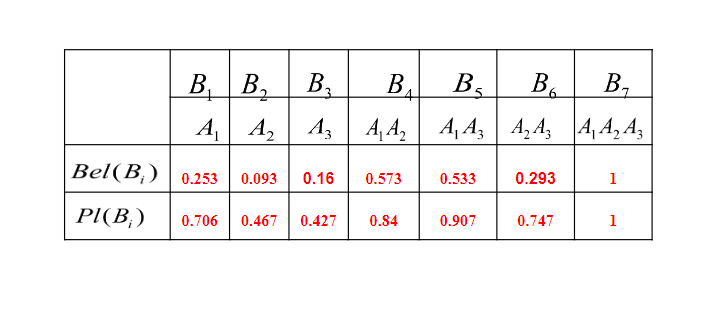